<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Building Linear Regression

Week 3 | 4.1

-----

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Understand and explain the meaning of the equations in Linear Regression (LR)
- Code all of the working parts (equations) of LR in Python
- Understand and explain why LR guarantees the most optimal solution
- Understand and explian why we want to minimize the square error
- Understand and explain what the parameters $\beta_{1}$, $\beta_{0}$, and $R^{2}$ mean
- Understand and explain the vector representation of LR


### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*
- Use matplotlib for making scatter plots
- Write basic functions in Python
- Understand how to take a partial derivative and what they mean


### INSTRUCTOR PREP
*Before this lesson, instructors will need to:*
- Review how LR's equations and how it is optimized
- Be prepared to code along with students in class

# Coding linear regression by hand

---

Start by creating the "simple linear regression" which means the prediction of an target variable by one predictor variable.

If $Y$ is our target variable and $X$ is our predictor variable, then the function defining the relationship between $X$ and $Y$ is:

### $$y = \beta_0 + \beta_1*x_1 + \epsilon_1$$

Where $\beta_0$, the first coefficient, is an offset commonly known as the intercept. Without the intercept term the regression line would always have to pass through the origin, which is almost never an optimal fit.

$\beta_1$ is the coefficient that multiplies the values of $X_1$ to estimate as close as possible the values of $Y$. Each value of $X_1$ is multiplied by the same coefficient as linear regression models a _linear_ relationship between our predictor and target variable. I've denoted $X$ as $X_1$ here to indicate it is the "first" variable we are modeling $Y$ with. In multiple regression there would be more than one $X$.

$\epsilon_1$ is the noise, or error. This is the difference between the predicted and true values that are unexplained by $X$ in the regression.

---

### Load real estate data

For this lab you'll be using a very simple dataset on housing prices. Load it from wherever you've put in on your computer. My path is below.

The variables are:

    sqft: the size of the house in sq. ft
    bdrms: number of bedrooms
    age: age in years of house
    price: the price of the house
    
I recommend converting price into units of 1000.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

from ipywidgets import *
from IPython.display import display

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [59]:
house = '~/DSI-SF-5/datasets/fast_food_chains/discrim.csv' 
house = pd.read_csv(house)

In [4]:
house.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


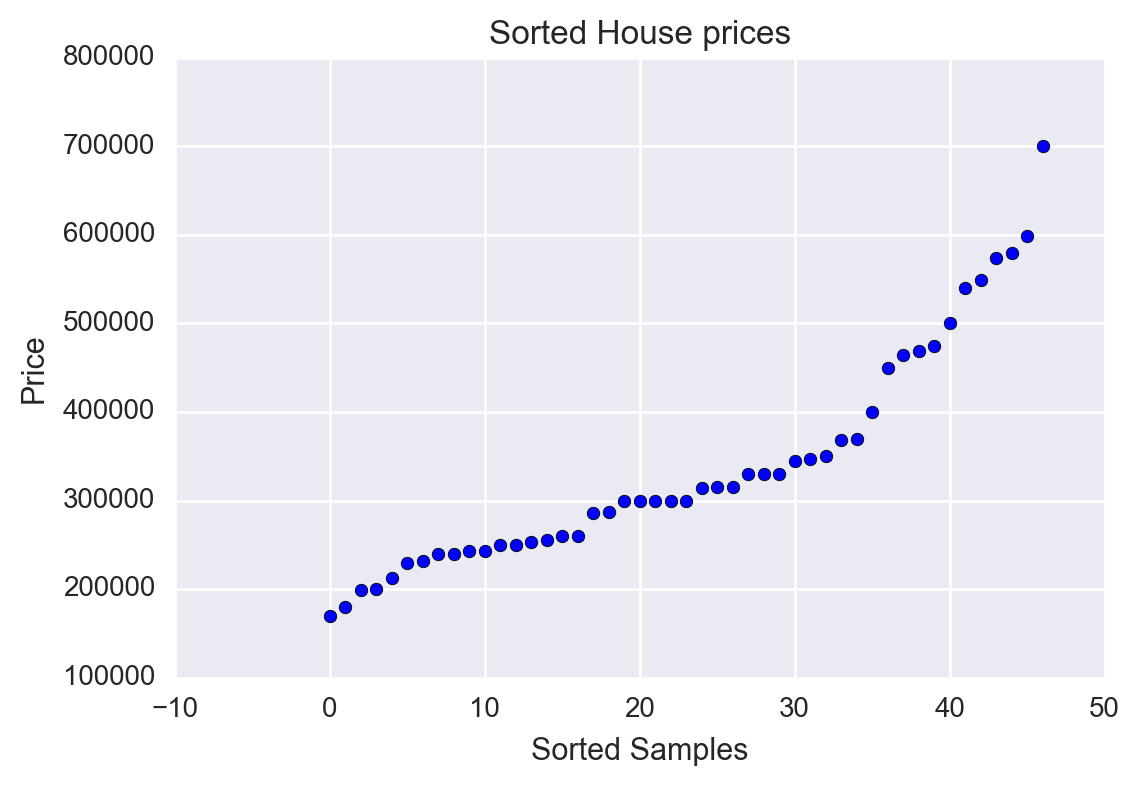

In [12]:
# sort values from smallest to largest
price = house.price.sort_values()
plt.scatter(range(len(price)), price);
plt.title("Sorted House prices");
plt.xlabel("Sorted Samples");
plt.ylabel("Price");

---

### Target and predictor variables

Define a target variable and predictor variable from the dataset. Often target and predictor are called dependent and independent variables in the context of linear regression. There are many different names for variables in models, but I generally stick to target and predictor, or X and Y. 

I'll be using price and sqrt

In [24]:
price = house.price.values/1000
sqft = house.sqft.values

---

### Simple linear regression equation

Our equation for the predicted values of our target variable is:

### $$\hat{y} = \beta_0 + \beta_1*x$$

$\hat{y}$ is the commonly used notation for the _predicted_ value of $y$.

(The $\epsilon$ error term is gone - it is an unknowable variable (if we knew what it was, we could perfectly model our target variable).

Write a function that will calculate a predicted $y$ ($\hat{y}$) from your $x$ variable and $\beta$ coefficients. 


---

### Plot a regression line

Set $\beta_0$ to be 0 and $\beta_1$ to be 1. This will create a regression line that passes through the origin (0,0) at a 45 degree angle.

#### Plot your target variable points and your currently poorly predicted points and regression line. 

Use your function above to calculate the predicted points.

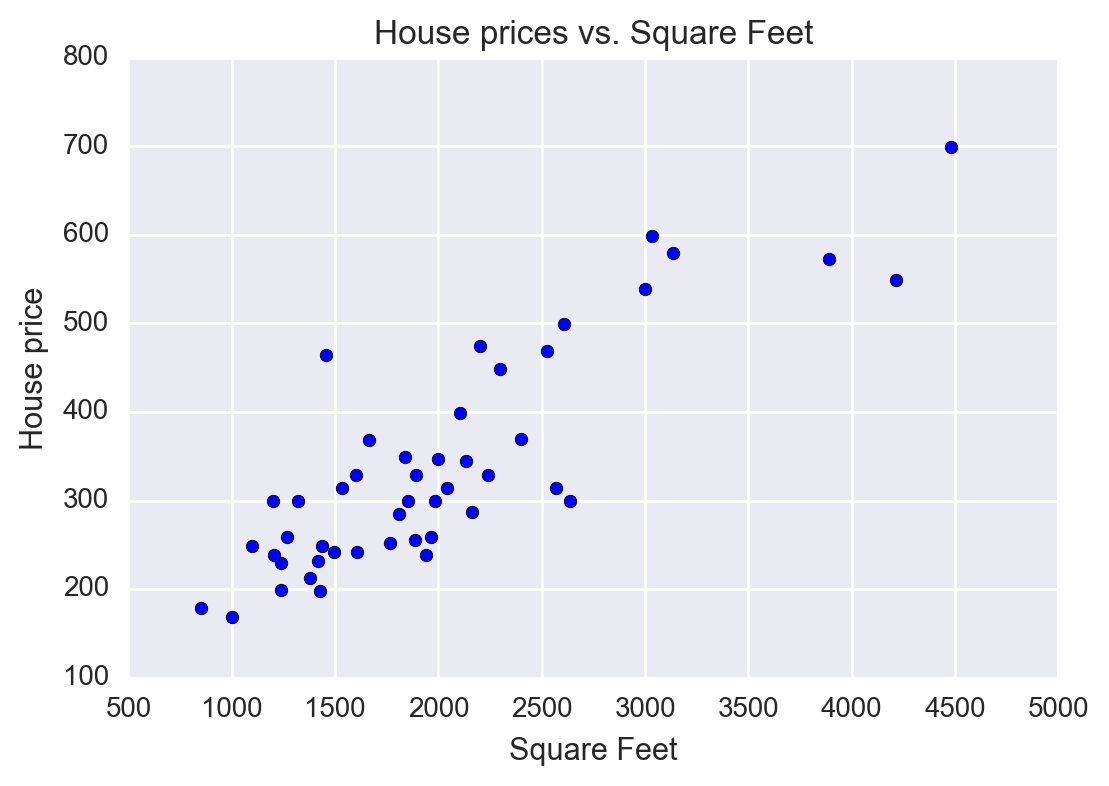

In [26]:
plt.scatter(sqft, price);
plt.title("House prices vs. Square Feet");
plt.xlabel("Square Feet");
plt.ylabel("House price");

### Initial Plot of Linear Regression

Here we are going to play with the beta values to see how that affects the qualit of our predictions. 

In [27]:
def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=50)
    ax.scatter(x, yhat, color='darkred', s=50, alpha=0.3)
    
    ax.plot(x, yhat, color='darkred', linewidth=1.5, alpha=0.7)
    plt.show()

In [ ]:
b0 = 100
b1 = 1000
plot_regression(sqft, price, b0, b1)

(You may not even be able to see the slope of the line if the magnitude of one of your variables is significantly greater than the other!)

### You Do

Change the values of b0 and b1, see if you can the predicted values closer to the true values. 



In [64]:
b0 = 100
b1 = 1000
#plot_regression(sqft, price, b0, b1)

---

### Residuals

The definition of "residuals" in linear regression is:

### $$ residual = y - \hat{y}$$

Where $y$ is the true value of our target at this observation, and $\hat{y}$ is the predicted value of our target. Simple enough. 

#### Write a function to calculate residuals below.


---

### Sum of squared errors and "least squares" estimation

Residuals are also referred to as errors: the amount "off" you were in your predictions.

Simple linear regression is an "ordinary least squares" method for solving linear relationships between variables. Here the ["least squares"](https://en.wikipedia.org/wiki/Least_squares) means that it _minimizes the sum of the squared residuals._

Why the squared residuals instead of just the absolute value of the residuals? Well, both are used – absolute value of residuals is often used when there are large outliers or other abnormalities in variables. 

However, [under assumptions that are typically met](https://en.wikibooks.org/wiki/Econometric_Theory/Assumptions_of_Classical_Linear_Regression_Model) minimizing the sum of squared errors is equivalent to estimating the [maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).



**Let's get a visualization of these error squares**

In [31]:
def plot_regression_square(x, y, b0, b1, pmin, pmax):

    fig = plt.figure(figsize=(10,5))
    
    ax = fig.gca()

    ax.set_xlim([pmin, pmax])
    ax.set_ylim([pmin, pmax])
        
    yhat = b0 + b1*x
    
    ax.scatter(x, y, s=70, color='steelblue')
    ax.scatter(x, yhat, s=70, color='darkred')
    ax.plot([pmin, pmax], [b0+b1*pmin, b0+b1*pmax], color='darkred', lw=2, alpha=0.5)
    ax.axvline(0, lw=2, c='black', linestyle='dashed')
    ax.axhline(0, lw=2, c='black', linestyle='dashed')
    
    for x_, y_, yh_ in zip(x, y, yhat):
        
        y1 = np.minimum(y_, yh_)
        y2 = np.maximum(y_, yh_)
        yr = np.ptp([y_, yh_])
        ax.plot([x_, x_+yr], [y1, y1], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_, x_+yr], [y2, y2], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_, x_], [y1, y2], color='darkred', linestyle='dotted', linewidth=1.5)
        ax.plot([x_+yr, x_+yr], [y1, y2], color='darkred', linestyle='dotted', linewidth=1.5)
    
    plt.tight_layout()
    
    fig.show()
    
def plot_delegator(intercept, beta1):
    
    plot_regression_square(x, y, intercept, beta1, pmin, pmax)
    
def generate_points(n=5, noise=10):
    x = np.cumsum(np.random.gamma(9, 0.5, size=n))
    y = (x+np.random.normal(0,noise,size=n))+np.random.normal(0,noise)
    return x, y

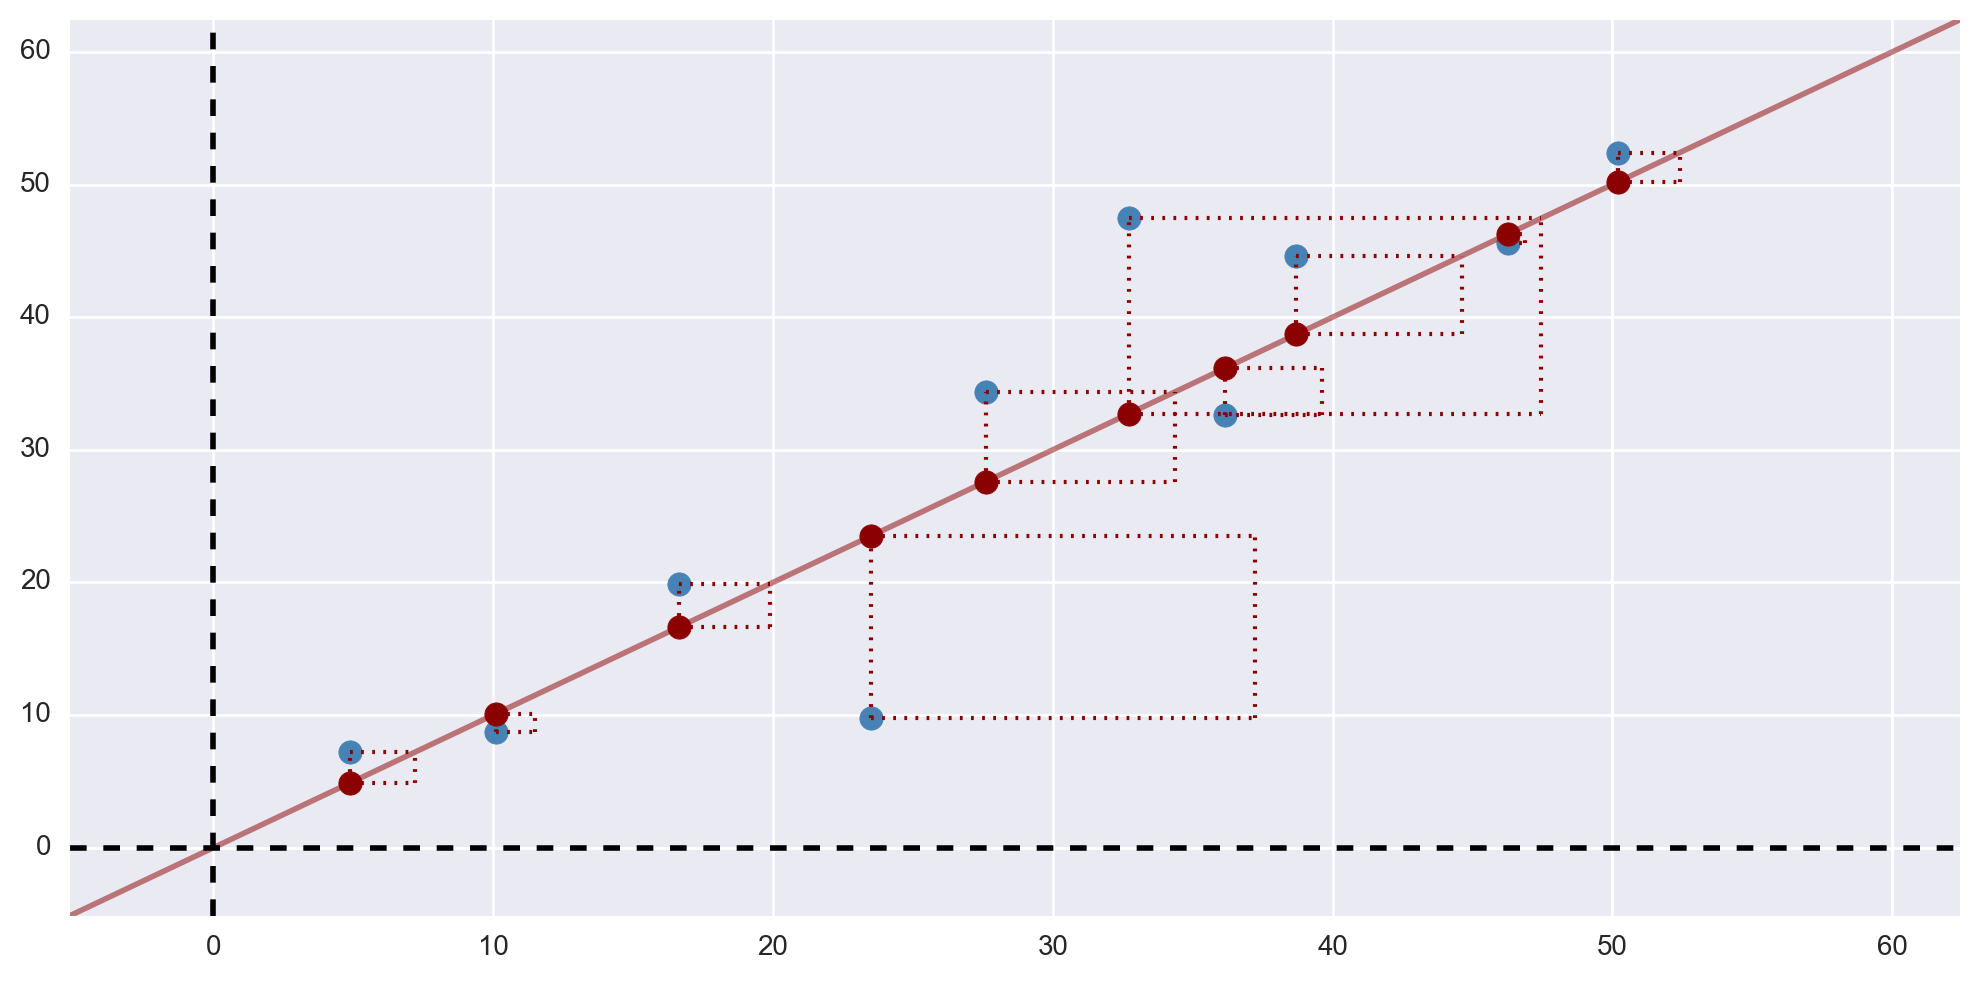

In [32]:
x, y = generate_points(n=10, noise=10)

pmax = np.maximum(np.max(y), np.max(x))+10
pmin = np.minimum(np.min(y), np.min(x))-10

interact(plot_delegator,
         intercept=widgets.FloatSlider(min=np.min(y)-30, max=np.max(y)+10, 
                                       step=0.25, value=0, continuous_update=True),
         beta1=widgets.FloatSlider(min=-1, max=4.5, 
                                   step=0.1, value=1, continuous_update=True));

The above widget shows the square errors for each data point from the synthetic data set. We can see that as we move the red line up and down, we decress the error squares for some points but increase it for other points.

# You Try

Play with the slider and try to find the optimum beta values for our house data set. 

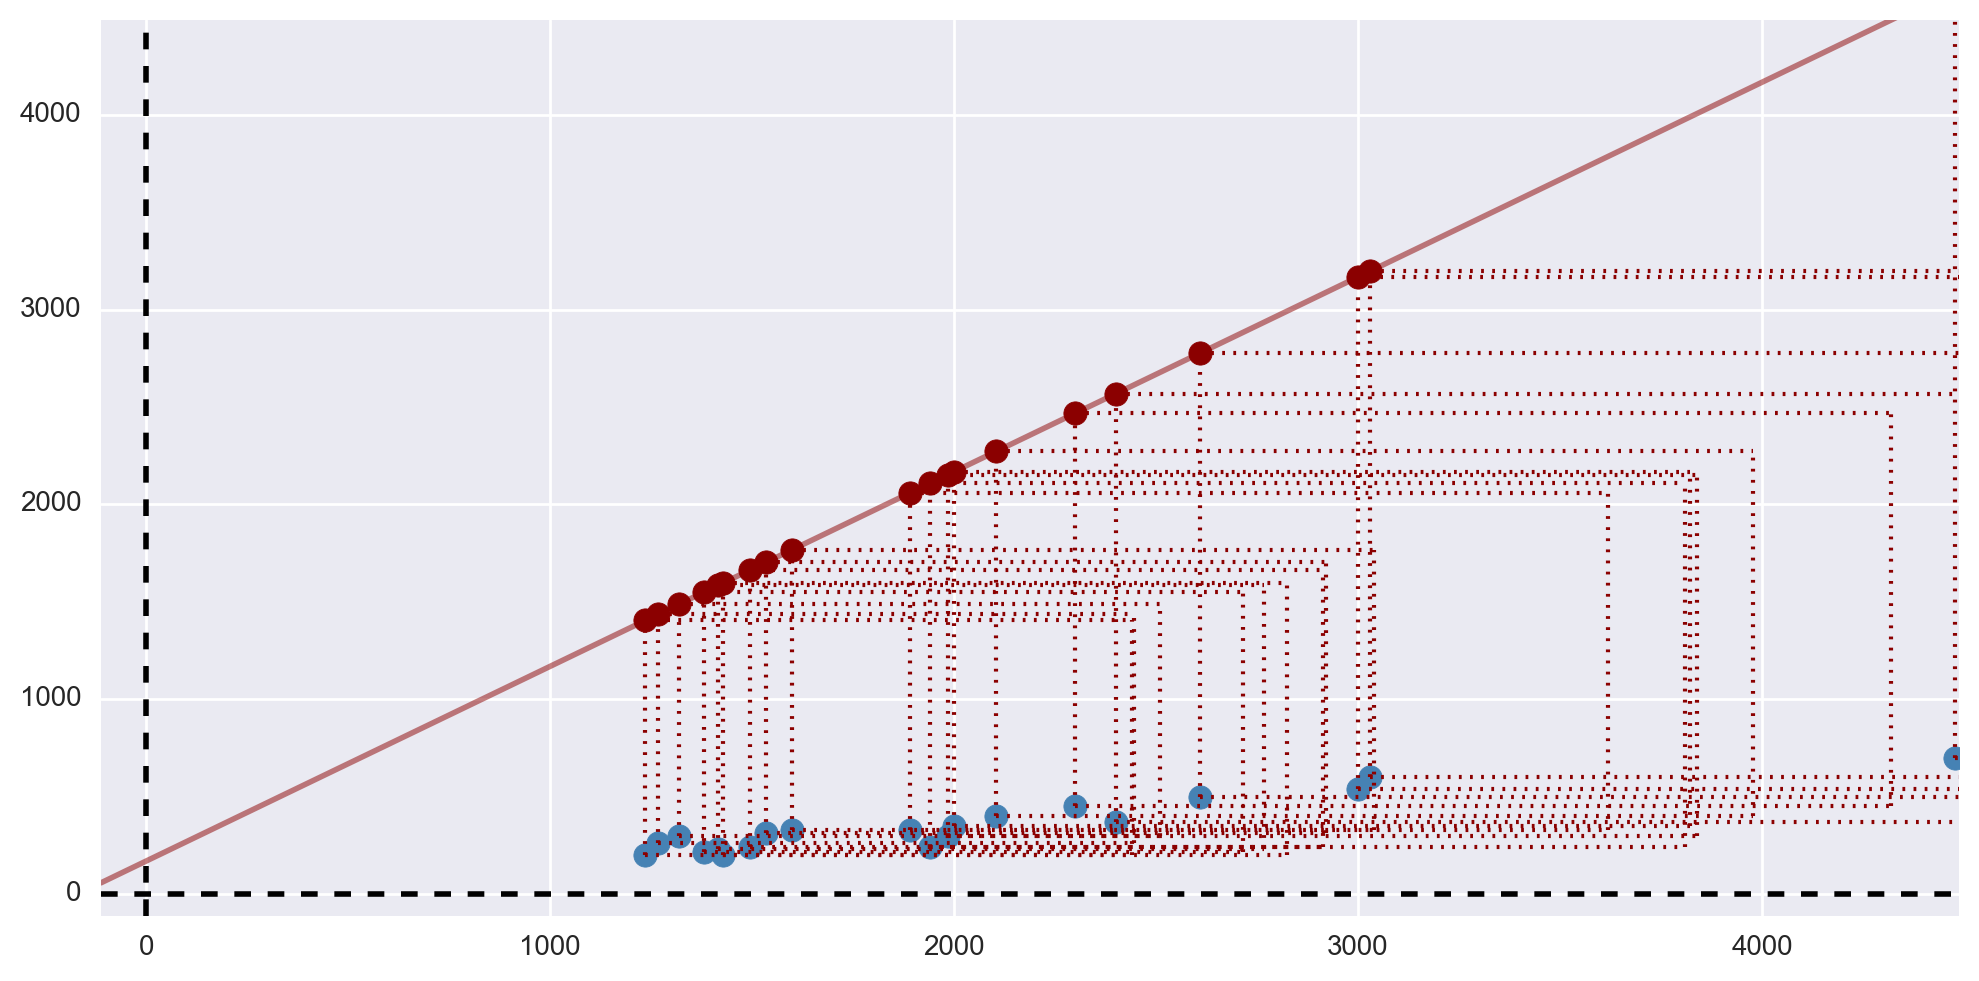

In [33]:
x, y = sqft[:20], price[:20]

pmax = np.maximum(np.max(y), np.max(x))+10
pmin = np.minimum(np.min(y)-300, np.min(x))-10

interact(plot_delegator,
         intercept=widgets.FloatSlider(min=np.min(y)-30, max=np.max(y)+10, 
                                       step=0.25, value=0, continuous_update=True),
         beta1=widgets.FloatSlider(min=-1, max=4.5, 
                                   step=0.1, value=1, continuous_update=True));

#### Write a function to calculate the sum of squared errors/residuals.

#### Calculate the sum of squared errors from your initial regression line above.

#### Plot again with a new $\beta_0$ and $\beta_1$ you think might be better

Use the values that you found to lead to a good fit from the widget

In [66]:
# b0 = 
# b1 = 
#plot_regression(sqft,price,b0,b1)

#### Now calculate the new SSE

Using same beta values from play with the widget. 

---

### Minimizing the sum of squared errors

Deriving the equation that minimizes the sum of squared errors in simple linear regression can be done using calculus. [See here](http://web.cocc.edu/srule/MTH244/other/LRJ.PDF) or [here](https://en.wikipedia.org/wiki/Simple_linear_regression) for descriptions of the derivation.

Skipping the partial derivitaves, the formulas for the $\beta_0$ and $\beta_1$ that minimize the sum of squares are:

### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

where $\bar{x}$ and $\bar{y}$ are the mean of $x$ and $y$, respectively.

#### Write functions below to calculate $\beta_0$ and $\beta_1$

#### Calculate the optimal $\beta_1$ and $\beta_0$. Confirm the two equations for $\beta_1$ are (essentially) the same.

$\beta_1$ is in fact also equivalent to:

### $$ \beta_1 = \frac{cov(x, y)}{var(x)} $$

#### Plot the regression with the optimal parameters and calculate the SSE.

In [67]:
#plot_regression(sqft, price, b0, b1)

---

### Pearson's r and how it relates to simple linear regression

Reall that the Pearson correlation coefficient, or Pearson's r, is defined as:

### $$ cor(x, y) =\frac{cov(x, y)}{std(x)std(y)} = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $$

If that looks similar to the equation for $\beta_1$ above, well, it's because it is.

#### Calculate the Pearson's r between your target and predictor below

For now, write your own function according to the equation above.

In [69]:
def pearson(x,y):
    return np.cov(x,y)[0,1]/((np.std(x))*(np.std(y)))

In [44]:
r = pearson(sqft,price)
r

0.87365711521910683

You can see that the $\beta_0$ coefficient and Pearson's r are _nearly_ the same, but not quite...

---

### Pearson's r and "degrees of freedom"

The concept of "degrees of freedom" comes up a lot in statistics, and can be a source of a lot of confusion. 

A simplified definition of degrees of freedom is: 

> The number of final calculations in a statistical estimate that are allowed to vary. This restriction is necessary when the statistical estimate requires one or more other statistical estimates to be measured from the sample first.

Degrees of freedom lets you adjust for the size of your sample: estimates from smaller samples are adjusted more. Why do we do this, and how?

Take the formula for Pearson's r for the overall population $X$ and $Y$:

### $$ cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

This is equivalent to the formula above, but imagine we had _all_ the data. When we are talking about the overall (infinite) population, there are now guaranteed properties of statistical estimates that aren't guaranteed for the sample estimate.

For example, in the full population the sum of deviations from the mean are guaranteed to sum to 0. But with a small sample from this population, this is obviously not guaranteed.

If we want to estimate what Pearson's r would be for the _population_ but from our _sample_, then we need to take into account these guaranteed properties of the population statistic.

Because we using the mean of $x$ and the mean of $y$ to measure variance and standard deviation, to ensure that our deviations from the mean actually sum to zero we have to "leave one measurement out" in the calculation of the deviations. The last measurement of the deviation from the means has to make the deviations sum to zero!

This means that Pearson's r has **X,Y pairs - 2 degrees of freedom**, since we lose one degree of freedom for each of the two variables to adjust their mean deviations to sum to zero.


[Unbiased Variance](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation) explains what it means

[Simple Explaination of DOF](http://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics) Read about examples using hats (yes, hats) and the t-test.

[Explaination of DOF with Variance](http://onlinestatbook.com/2/estimation/df.html) Explains DOF by going through the calculate of variance as an example. Good resource!

The  `ddof=1` is being used to correct the biase on the original formula which uses $\frac{1}{n}$

$$s={{\frac {1}{n-1}}\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}$$

In [62]:
# example 1 - biased and unbiased variance calculation 
np.var([1,2,3,4,5], ddof=0), np.var([1,2,3,4,5], ddof=1)

(2.0, 2.5)

In [63]:
# example 2 - biased and unbiased variance calculation 
np.var([1,2,3,4,5,6,7,8,9,10], ddof=0), np.var([1,2,3,4,5,6,7,8,9,10], ddof=1)

(8.25, 9.1666666666666661)

#### Calculate the Pearson's r between target and dependent variables, using keyword argument `ddof=1` in both `np.var` and `np.std`

---

### $R^2$: the "coefficient of determination"

Though we will talk about evaluation metrics for regression in more detail in a later lecture, it is worth looking at the concept of $R^2$ while we are exploring the pieces of regression in granular detail.

$R^2$ is the **amount of variance explained above baseline in your target $y$ by predictor $x$**.

It is comprised of two parts: the total sum of squares and the residual sum of squares.

The total sum of squares is defined:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares is defined:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - f_i\right)^2 $$

Where $f_i$ is the prediction by your regression for $y$ at observation $i$.

$R^2$ is then calculated:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

The total sum of squares is the **baseline model**: the amount of variance in $y$ we would explain if we were to predict each point of $y$ with just the mean of $y$.

This is equivalent to estimating $y$ with nothing but the intercept term $\beta_0$, which becomes the mean of $y$ (the best possible estimator of $y$ with a single value: maximum likelihood):

### $$ \hat{y} = \beta_0 = \bar{y} $$


#### Plot your regression again, with a new regression line representing the baseline model

Print out the SSE for the baseline and model with predictor.

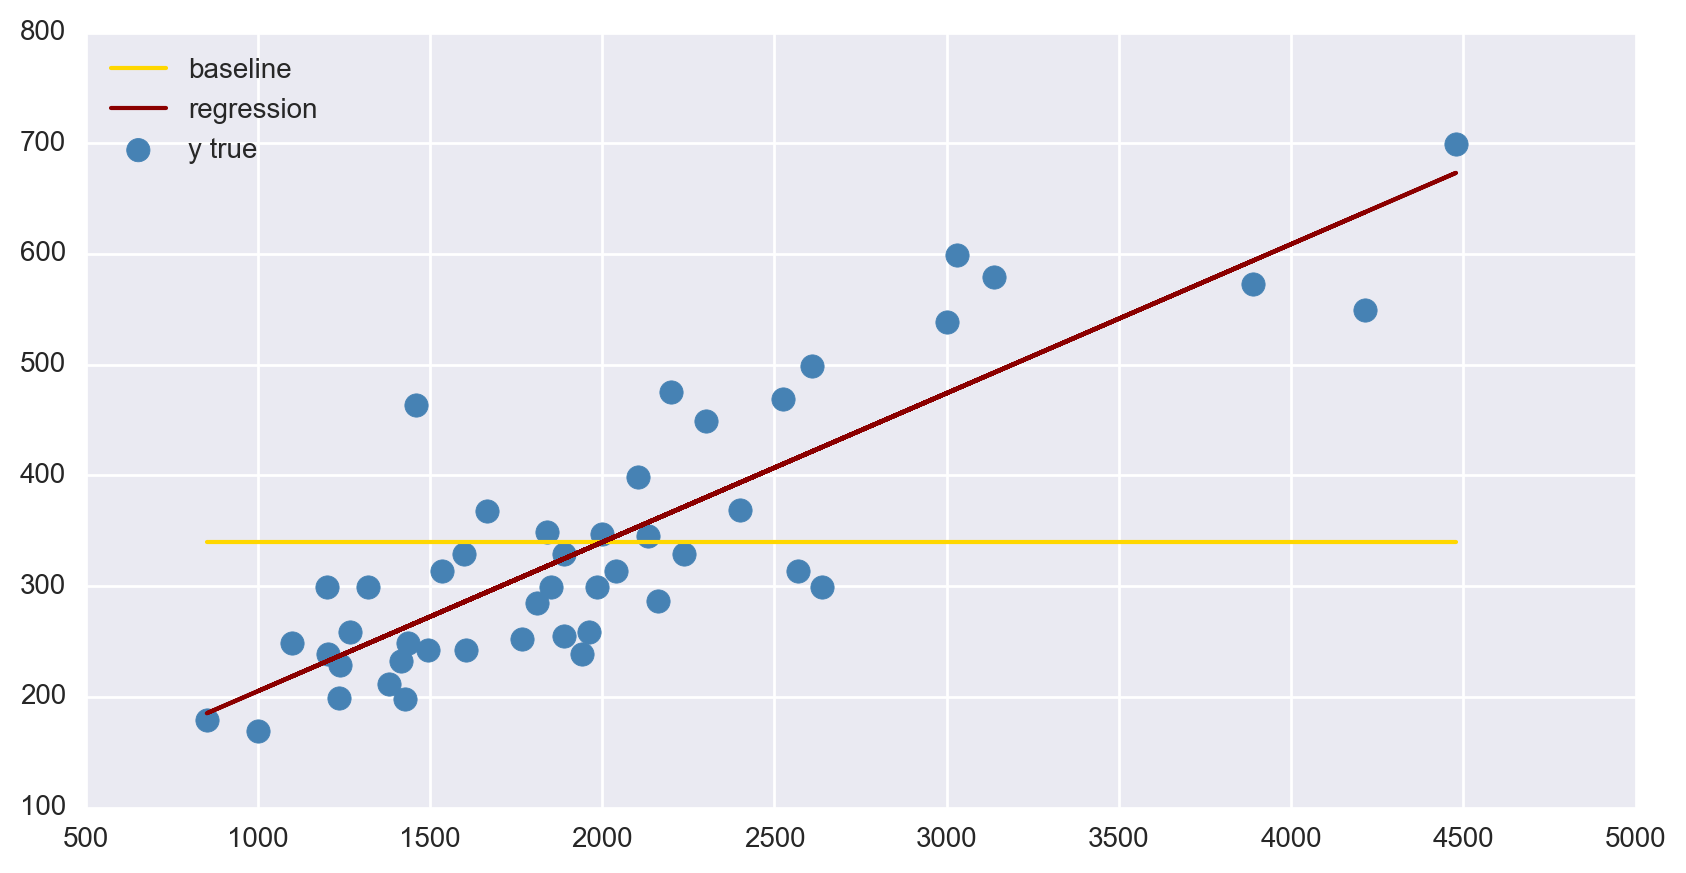

In [47]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

yhat = calculate_yhat(sqft, b0, b1)
y_mean = np.mean(price)

ax.scatter(sqft, price, color='steelblue', s=70, label='y true')
ax.plot([np.min(sqft), np.max(sqft)], [y_mean, y_mean], color='gold', linewidth=1.5, label='baseline')
ax.plot(sqft, yhat, color='darkred', linewidth=1.5, label='regression')

plt.legend(loc='upper left')
plt.show()

#### Write a function to calculate $R^2$ for baseline and regression models and print them out

#### Print out the Pearson's r squared:

# Lab - Independent Practice


---

### Multiple linear regression

It is of course rare in regression that you will only want to predict $y$ from a single predictor $x$. Multiple linear regression predicts $y$ from more than 1 $x$ variable.

The formula for computing the $\beta$ values in multiple regression is best done with linear algebra. I'm not going to go into the details of the _reason_ that this works, but if you want to see the explanation [these slides are a great resource](http://statweb.stanford.edu/~nzhang/191_web/lecture4_handout.pdf).

The linear algebra formula is as follows, where $X$ is a _matrix_ of predictors $x_1$ through $x_i$ (with each column a predictor), and $y$ are the true values of $y$. There is still only 1 predicted variable:

### $$ \hat{y} = \beta X $$

_The intercept term is part of $X$! It is a column of all ones added to the columns of predictors._

Written out more simply, without the linear algebra, $\hat{y}$ is calculated:

### $$ \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n $$

The calculation of the $\beta$ values is done with the linear algebra matrix multiplication formula:

### $$ \beta = (X'X)^{-1}X'Y $$

Where $X'$ is the _transposed matrix of original matrix $X$_ and $(X'X)^-1$ is the _inverted matrix_ of $X'X$.

Don't worry about the linear algebra here if you don't have experience with it. It's not so important to understand. Just remember that $y$ is estimated with an intercept term and each $x$ predictor multiplied by it's own $\beta$ value.

#### Create a "design matrix" with the first column a column of all 1s (intercept column) and the other columns the variables in the dataset that are not the target variable

This is easiest to do with pandas: add a column for the intercept first, then extract the matrix with `.values`

In [43]:
house['intercept'] = 1
design = house[['intercept','sqft','bdrms','age']]
design.head()

,intercept,sqft,bdrms,age
0,1,2104,3,70
1,1,1600,3,28
2,1,2400,3,44
3,1,1416,2,49
4,1,3000,4,75


In [44]:
design = design.values
design[0:5,:]

array([[   1, 2104,    3,   70],
       [   1, 1600,    3,   28],
       [   1, 2400,    3,   44],
       [   1, 1416,    2,   49],
       [   1, 3000,    4,   75]])

#### Compute the beta values using the formula above

**The transpose of a matrix is calculated by appending `.T` to the matrix:**

    X.T

**Matrices multipled in the formula should be done as the "dot product" with:**

    np.dot(mat1, mat2)

**Inverting a matrix is done with the function:**

    np.linalg.inv()

#### Print out the vector of betas:

#### Calculate predicted $\hat{y}$ with your predictors and $\beta$ coefficients

#### Plot the predicted values $\hat{y}$ against the true values $y$

Also plot a line through the origin at a 45 degree angle (positive slope).

#### Calculate the $R^2$ of the multiple regression model

# Resources

[Comprehensive Khan Academy Videos on Ordinary Least Squares](https://slack-redir.net/link?url=https%3A%2F%2Fwww.khanacademy.org%2Fmath%2Fstatistics-probability%2Fdescribing-relationships-quantitative-data%2Fresiduals-least-squares-rsquared%2Fv%2Fproof-part-1-minimizing-squared-error-to-regression-line) These videos go through most the equations and concepts covered in this notebook. For instance, one video derives the least square formula in real time. 

[Slides on Matrix Representation of Linear Regression](http://statweb.stanford.edu/~nzhang/191_web/lecture4_handout.pdf)